# Introducción al Deep Learning: fundamentos, arquitecturas y aplicaciones
## David de la Rosa de la Rosa (drrosa@ujaen.es)
## Manuel Germán Morales (mgerman@ujaen.es)


En este cuaderno mostraremos algunas de las aplicaciones de los Transformers usando HuggingFace

In [ ]:
!pip install transformers torch torchvision trimesh open3d pythreejs ipywidgets lightning huggingface_hub --quiet

# Introducción a HuggingFace

**Hugging Face** es una empresa y plataforma de código abierto que facilita el desarrollo y acceso a modelos de inteligencia artificial. Aunque comenzó centrada en el procesamiento del lenguaje natural (PLN), hoy en día también ofrece herramientas y modelos para visión por computadora, audio, robótica y más. Su biblioteca **[Transformers](https://huggingface.co/docs/transformers)** permite a los desarrolladores y usuarios trabajar fácilmente con modelos preentrenados como BERT, GPT, CLIP o Stable Diffusion para tareas como generación de texto, clasificación de imágenes o análisis de audio. Además, la plataforma fomenta la colaboración mediante el intercambio de modelos, datasets y experimentos, promoviendo una comunidad abierta e innovadora en torno a la IA.

Para empezar rápidamente con **Transformers**, puedes utilizar la función [`pipeline()`](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) para hacer inferencias con modelos listos para usar. También puedes cargar modelos y preprocesadores preentrenados utilizando una [AutoClass](https://huggingface.co/docs/transformers/main/en/model_doc/auto), y entrenar rápidamente tus propios modelos usando **PyTorch** y **PyTorch Lightning**. Si estás comenzando, se recomienda explorar los [tutoriales](https://huggingface.co/docs/transformers/tutorials) o el [curso interactivo gratuito](https://huggingface.co/course/chapter1/1) para profundizar en los conceptos clave de esta potente librería.

Como se ha comentado, puedes usar [`pipeline()`](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) directamente, sin necesidad de configuración adicional, para muchas tareas en distintas modalidades, algunas de las cuales se muestran en la siguiente tabla:

| **Tarea**                        | **Descripción**                                                                                        | **Modalidad**          | **Identificador de pipeline**                   |
| -------------------------------- | ------------------------------------------------------------------------------------------------------ | ---------------------- | ----------------------------------------------- |
| Clasificación de texto           | Asigna una etiqueta a una secuencia de texto dada                                                      | PLN                    | `pipeline(task="sentiment-analysis")`           |
| Generación de texto              | Genera texto a partir de un mensaje inicial (prompt)                                                   | PLN                    | `pipeline(task="text-generation")`              |
| Resumen (summarization)          | Genera un resumen de una secuencia de texto o documento                                                | PLN                    | `pipeline(task="summarization")`                |
| Clasificación de imágenes        | Asigna una etiqueta a una imagen                                                                       | Visión por computadora | `pipeline(task="image-classification")`         |
| Segmentación de imágenes         | Asigna una etiqueta a cada píxel de una imagen | Visión por computadora | `pipeline(task="image-segmentation")`           |
| Detección de objetos             | Predice los recuadros delimitadores y clases de objetos en una imagen                                  | Visión por computadora | `pipeline(task="object-detection")`             |
| Clasificación de audio           | Asigna una etiqueta a un fragmento de audio                                                            | Audio                  | `pipeline(task="audio-classification")`         |
| Reconocimiento automático de voz | Transcribe el habla en texto                                                                           | Audio                  | `pipeline(task="automatic-speech-recognition")` |
| Visual Question Answering (VQA)         | Responde una pregunta sobre una imagen, dado una imagen y una pregunta                                 | Multimodal             | `pipeline(task="vqa")`                          |
| Preguntas sobre documentos       | Responde una pregunta sobre un documento, dado una imagen y una pregunta                               | Multimodal             | `pipeline(task="document-question-answering")`  |
| Descripción de imágenes          | Genera un pie de foto (caption) para una imagen dada                                                   | Multimodal             | `pipeline(task="image-to-text")`                |

Comienzaremos creando una instancia de `pipeline()` para análisis de sentimientos como ejemplo, usando el modelo `distilbert-base-uncased-finetuned-sst-2-english`.


## Análisis de sentimientos

Importamos la función `pipeline()` de la librería `transformers`. Esta función contiene todos los pasos necesarios (pre-procesamiento, inferencia y post-procesamiento) para poder realizar la tarea de análisis de sentimientos con el modelo seleccionado de manera invisible. En concreto, para `sentiment-analysis`, se realiza lo siguiente:

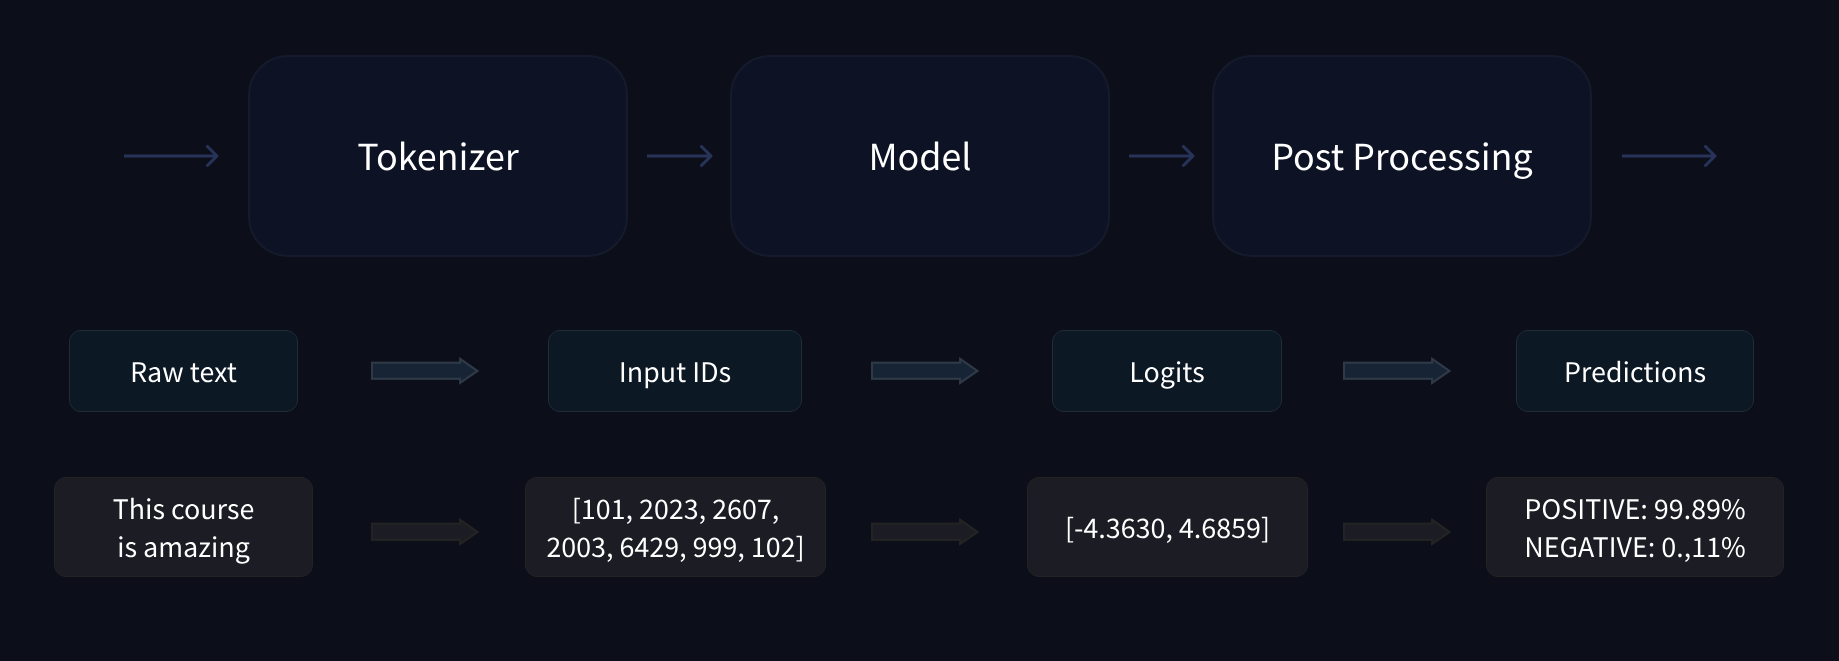

Puedes leer detalladamente que significa cada paso del pipeline en: https://huggingface.co/learn/llm-course/chapter2/2

In [ ]:
from transformers import pipeline

La función `pipeline()` descarga y almacena en caché un modelo preentrenado predeterminado y un tokenizador para análisis de sentimientos. Ahora puedes usar el `classifier` en el texto que desees analizar:


In [ ]:
texto = "Me gusta mucho este curso"

In [ ]:
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
classifier(texto)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9981743097305298}]

Si tienes más de una entrada, pasa tus entradas como una lista a la función `pipeline()` para obtener una lista de diccionarios como resultado:


In [ ]:
textos = ["Odio que haga tanta calor.",
          "Me gusta mucho el verano, pero no tanto como el invierno.",
          "¿De verdad piensas que me gusta viajar? Porque no solo me gusta, me encanta."]

In [ ]:
resultados = classifier(textos)
for res in resultados:
    print(f"Sentimiento: {res['label']}, puntuación: {round(res['score'], 4)}")

Sentimiento: NEGATIVE, puntuación: 0.9866
Sentimiento: POSITIVE, puntuación: 0.8668
Sentimiento: NEGATIVE, puntuación: 0.9674


Podemos ver que, con solo dos líneas de código, hemos realizado un análisis de sentimientos de la frase dada como entrada.

# Generación de texto

En este ejemplo usaremos un pipeline para la generación de texto usando GPT2. Para ello, solo tenemos que indicar como nombre de tarea `text-generation` y como modelo `gpt2`. La función `pipeline` se encargará automáticamente de obtener el modelo y su tokenizador correspondiente para realizar la inferencia correctamente.

In [ ]:
# Frase inicial para la generación
prompt = "Bob and John were walking together"

In [ ]:
from transformers import set_seed
import torch

# Configurar la semilla para reproducibilidad
set_seed(42)

# Crear el pipeline de generación de texto con GPT-2
generator = pipeline("text-generation", model="gpt2")

# Generar texto
output = generator(prompt, max_new_tokens=50, num_return_sequences=1)

# Mostrar resultado
output[0]["generated_text"]


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Bob and John were walking together into a car. John was a little angry about everything, and he started shouting obscenities at them. "I\'m going to kill you! I\'m going to kill you!" He started beating up John, and when he finished John went to'

Sin embargo, podemos prescindir de `pipeline()` para implementar métodos más complejos. Consecuentemente, seremos los encargados de pre-procesar, inferir y post-procesar las entradas y salidas del modelo. Necesitaremos:


1. **Cargar el modelo**
   Utilizamos `from_pretrained()` para cargar un modelo y su tokenizer correspondiente. En el caso de un modelo del lenagueje:

   ```python
   tokenizer = AutoTokenizer.from_pretrained("nombre-del-modelo")
   model = AutoModelForXXX.from_pretrained("nombre-del-modelo")
   ```

  Las clases `Auto*` asignan y cargan automáticamente nuestro modelo localizando su clase correspondiente. Por ejemplo, para `gpt2` y la tarea de `text-generation` usaríamos
  
   ```python
   tokenizer = AutoTokenizer.from_pretrained("gpt2")
   model = AutoModelForCausalLM.from_pretrained("gpt2")
   ```
   Las clases usadas para nuestro modelo serían `GPT2Tokenizer` para el tokenizador y `GPT2LMHeadModel` para el modelo
2. **Preprocesar la entrada**
   Convertimos texto en tensores que el modelo pueda procesar:

   ```python
   inputs = tokenizer(texto, return_tensors="pt")
   ```

3. **Realizar la inferencia (forward pass)**
   Ejecutamos el modelo directamente para obtener logits, embeddings, atenciones, etc.:

   ```python
   with torch.no_grad():
       outputs = model(**inputs)
   ```

4. **Postprocesar la salida**
   Interpretamos y transformamos los outputs en información útil, como texto, etiquetas, puntuaciones, etc.

Entre los pasos anteriores podemos hacer el procesamiento que creamos conveniente. En este caso, vamos a extraer las matrices de atención de GPT2 para cada una de sus capas. Usando únicamente `pipeline()` no podríamos hacer esto.


In [ ]:
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, set_seed
import math
from ipywidgets import interact, IntSlider
import numpy as np

set_seed(42)

# Cargar modelo y tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2", output_attentions=True)
model.eval()

# Pre-procesar texto de entrada
inputs = tokenizer(prompt, return_tensors="pt")
inputs_ids = inputs["input_ids"]

# Realizar inferencia fuera del pipeline, simular función generate()
max_new_tokens = 5  # tokens a generar
generated = inputs_ids.clone()

model.eval()

with torch.no_grad():
    for _ in range(max_new_tokens):
        outputs = model(generated)
        logits = outputs.logits  # shape: (batch_size, seq_len, vocab_size)

        # Take logits of last token
        next_token_logits = logits[:, -1, :]

        # Greedy decoding: pick highest probability token
        next_token_id = torch.argmax(next_token_logits, dim=-1).unsqueeze(0)

        # Append to sequence
        generated = torch.cat((generated, next_token_id), dim=1)

# Decodificar los indices de los tokens generados a cadenas de texto
generated_text = tokenizer.decode(generated[0], skip_special_tokens=True)
print("Texto generado:")
print(generated_text)

# Atenciones por capa, para su visualización
attentions = outputs.attentions  # Lista de tensores por capa
print(attentions[0].shape)
# post-procesamiento, eliminar simbolos extraños y convertir indices de tokens a palabras.
tokens = tokenizer.convert_ids_to_tokens(generated[0])
tokens = [t.replace('Ġ', ' ') for t in tokens]

def plot_attention_layer(layer):
    attention_layer = attentions[layer][0]  # shape: (heads, seq_len, seq_len)
    num_heads = attention_layer.shape[0]

    seq_len = len(tokens) - 1 # el ultimo token no tiene atención
    grid_cols = 3
    grid_rows = math.ceil(num_heads / grid_cols)
    fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(4 * grid_cols, 4 * grid_rows))

    axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

    for i in range(num_heads):
        ax = axs[i]
        attn = attention_layer[i].detach().numpy()

        im = ax.imshow(attn, cmap="viridis", aspect="auto")
        ax.set_title(f"Cabeza {i}", fontsize=10)

        ax.set_xticks(range(seq_len))
        ax.set_xticklabels(tokens[:seq_len], rotation=90, fontsize=8)

        ax.set_yticks(range(seq_len))
        ax.set_yticklabels(tokens[:seq_len], fontsize=8)

        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    for j in range(num_heads, grid_rows * grid_cols):
        fig.delaxes(axs[j])

    fig.suptitle(f"Atención - Capa {layer} ({num_heads} Cabezas)", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Visualización interactiva con slider. La función se llama al cambiar el valor.
interact(
    plot_attention_layer,
    layer=IntSlider(min=0, max=len(attentions) - 1, step=1, value=0, description="Capa"),
)


The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Texto generado:
Bob and John were walking together, and they were talking
torch.Size([1, 12, 10, 10])


interactive(children=(IntSlider(value=0, description='Capa', max=11), Output()), _dom_classes=('widget-interac…

<function __main__.plot_attention_layer(layer)>

# Recuperación Imagen-Texto o Recuperación multimodal

CLIP (Contrastive Language-Image Pretraining) es un modelo multimodal desarrollado por OpenAI que aprende a relacionar imágenes con descripciones textuales. En lugar de generar texto o imágenes, CLIP mide la similitud entre una imagen y varios textos, identificando cuál de esos textos describe mejor la imagen. Esta capacidad se utiliza en tareas de recuperación multimodal (image-text retrieval), donde se busca emparejar imágenes con textos relevantes o viceversa, facilitando aplicaciones como búsqueda visual basada en texto o clasificación guiada por descripciones.

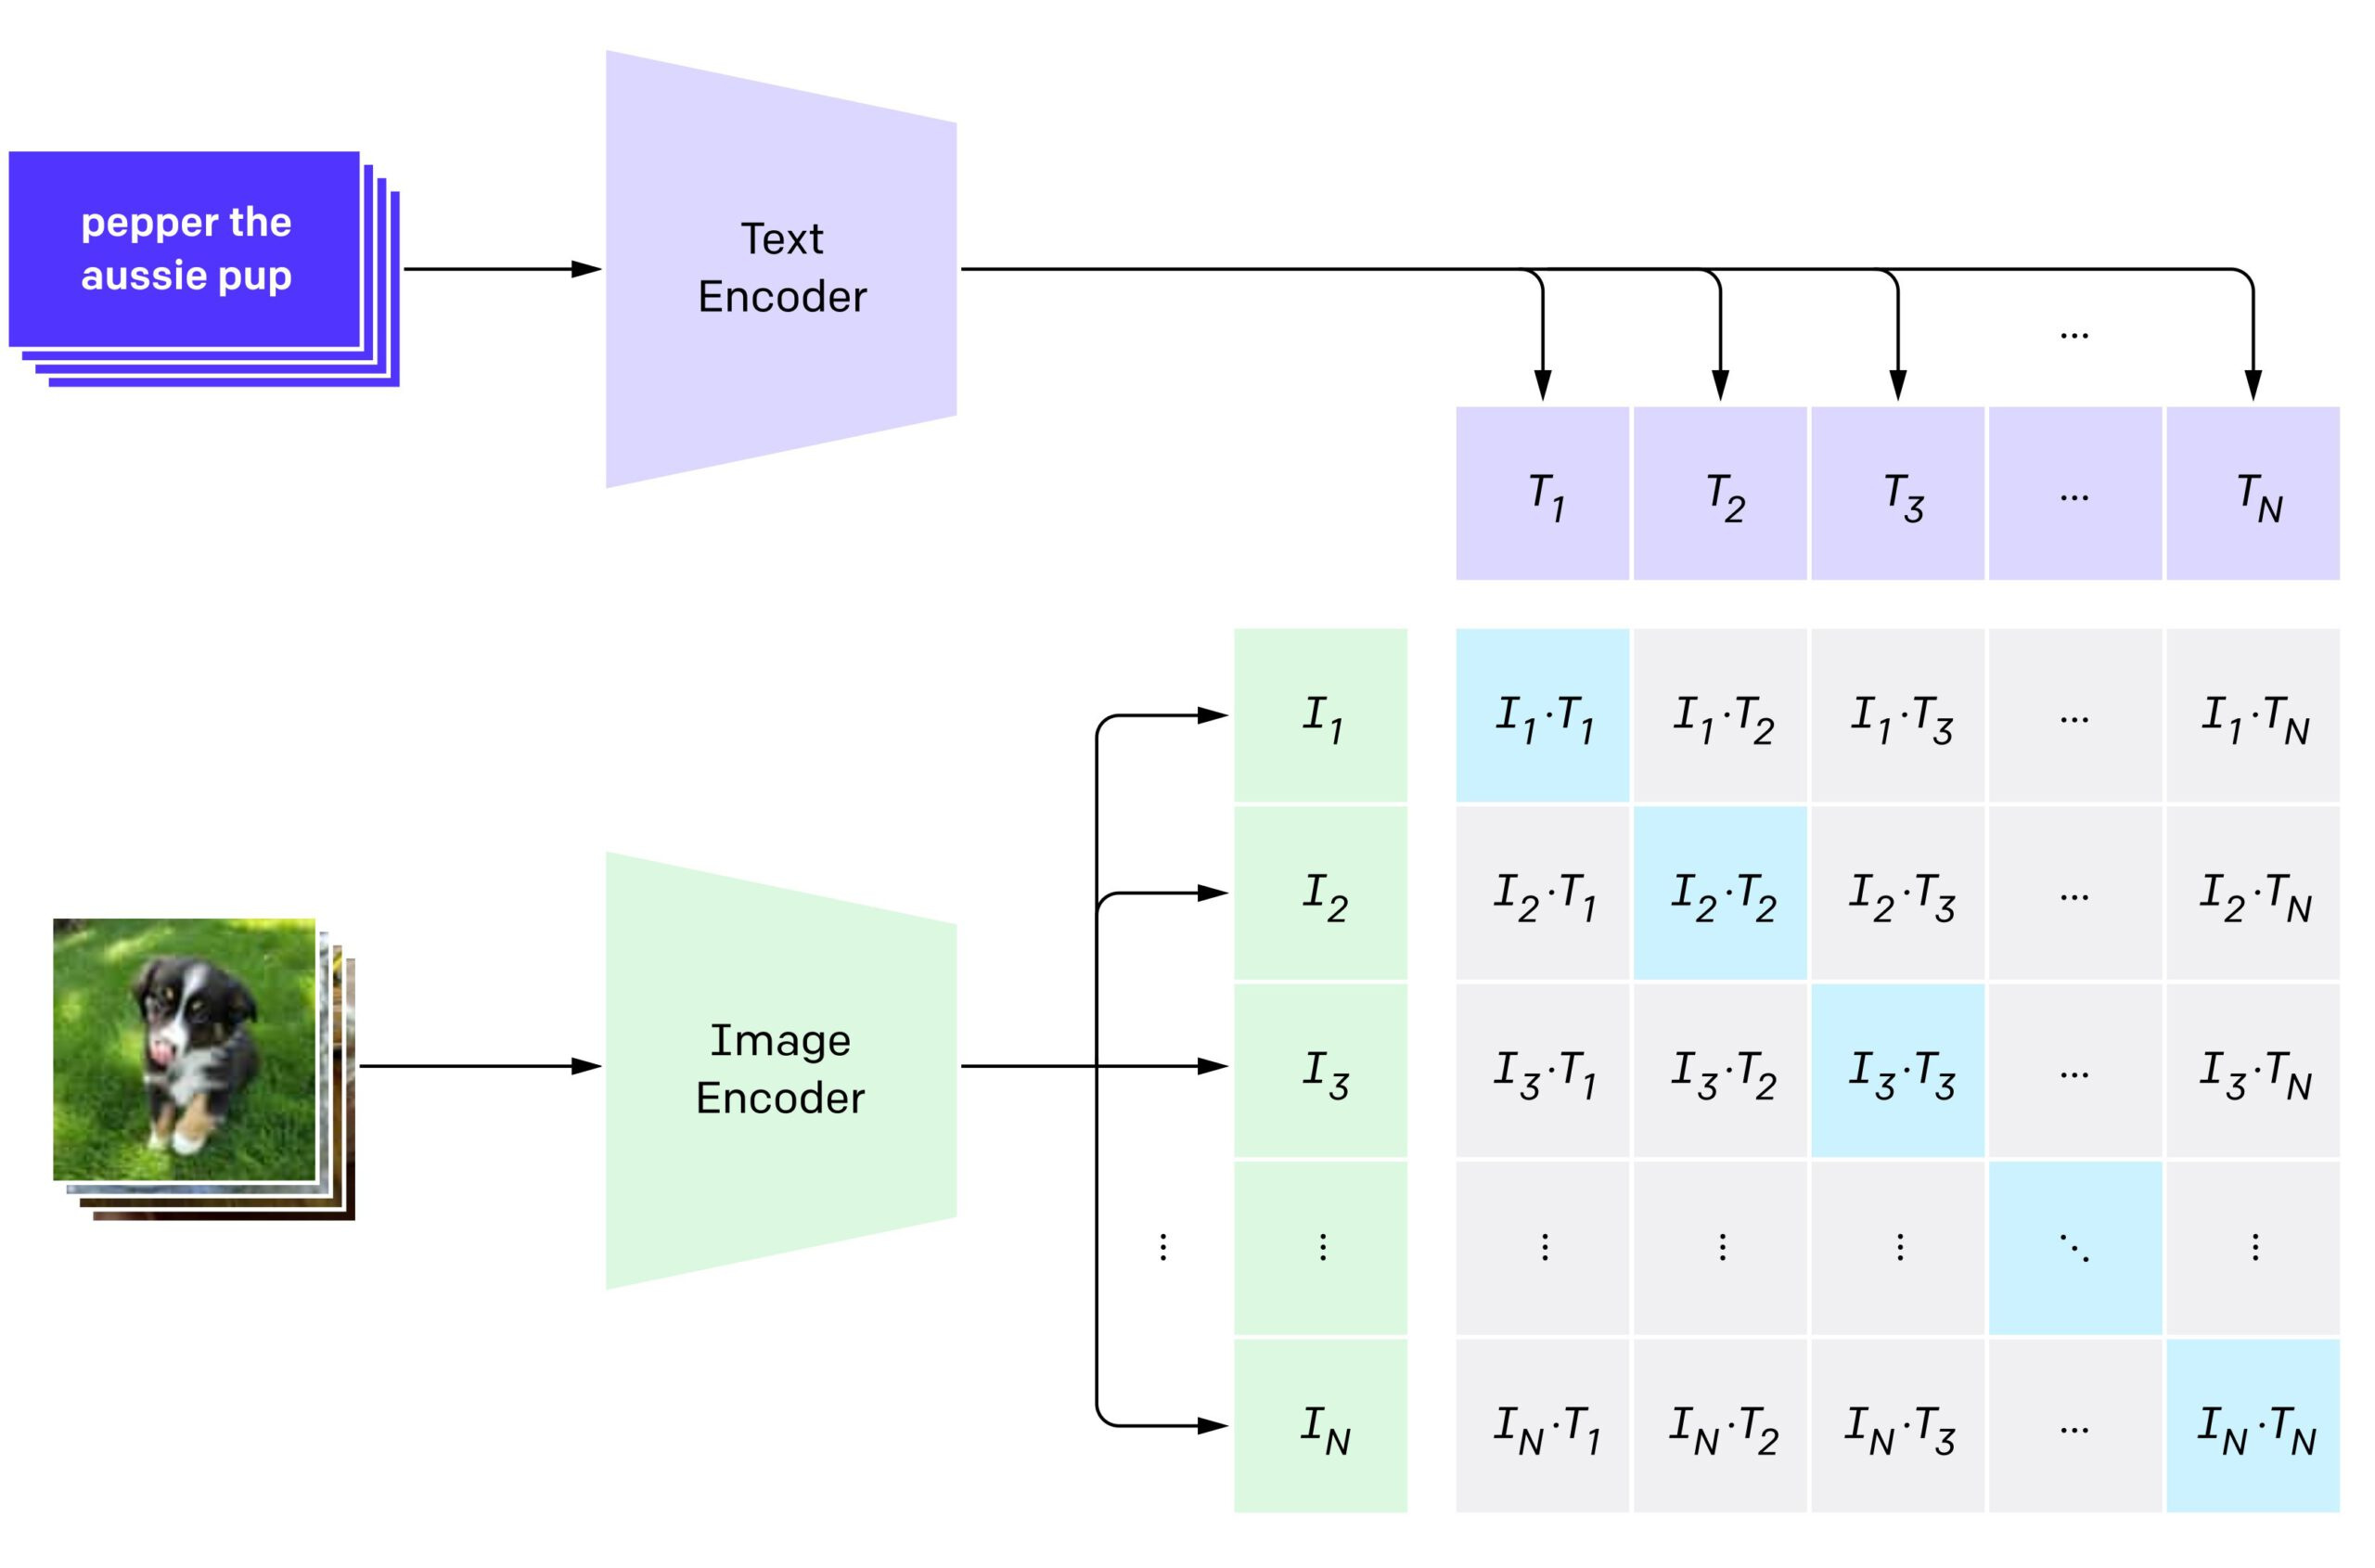

CLIP tiene dos partes entrenadas conjuntamente:

- Un codificador de imagen (por ejemplo, ViT o ResNet).

- Un codificador de texto (como un Transformer pequeño).

Recuerda: CLIP **no genera texto** ni describe imágenes como BLIP. Lo que hace es calcular similitud entre una imagen y varios textos (o viceversa).

A continuación usamos CLIP para buscar qué descripción se asocia con nuestra imagen de entrada.

In [ ]:
IMG_PATH = "./gatuja.jpeg"

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

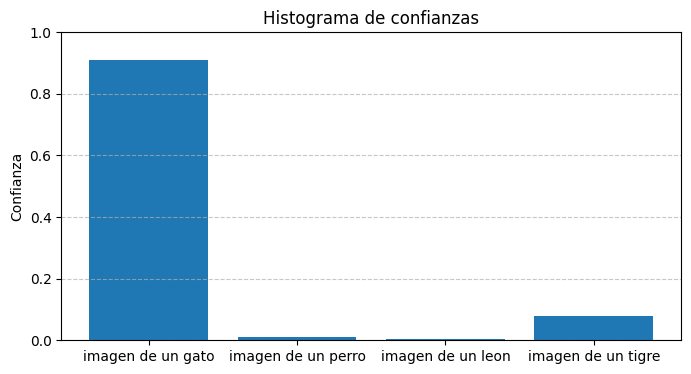

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

image = Image.open(IMG_PATH)

# Creamos nuestras descripciones
texts = ["imagen de un gato", "imagen de un perro", "imagen de un leon", "imagen de un tigre"]

# Obtenemos el processor y el modelo. En este caso, no hemos usado las AutoClases
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

# Pre-procesamos las entradas y obtenemos las salidas del modelo
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Convertir los valores en crudo en una distribución de probabilidad 0-1
probs = outputs.logits_per_image.softmax(dim=1)
values = probs.detach().flatten().numpy() #Para quedarnos con los valores en forma de array de numpy

# Dibujamos los resultados
plt.figure(figsize=(8, 4))
plt.bar(texts, values)
plt.ylabel('Confianza')
plt.title('Histograma de confianzas')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Descripción de imágenes condicionada y no condicionada

BLIP (Bootstrapped Language-Image Pretraining) es un modelo multimodal, por lo que entiende imágenes y texto al mismo tiempo. Se usa principalmente para tareas como la generación de descripciones de imágenes, VQA y para relacionar texto con imágenes. En nuestro caso, lo usaremos para generar descripciones de imágenes.

BLIP combina dos partes principales para generar descripciones de imágenes:

- Un codificador visual (como Vision Transformer o ViT) que analiza la imagen.

- Un modelo de lenguaje (como BERT o GPT-like) que genera la descripción.

El modelo ha sido entrenado con millones de pares imagen-texto, lo que le permite entender cómo se relacionan.

Vamos a generar una descripción para la imagen anterior usando BLIP.

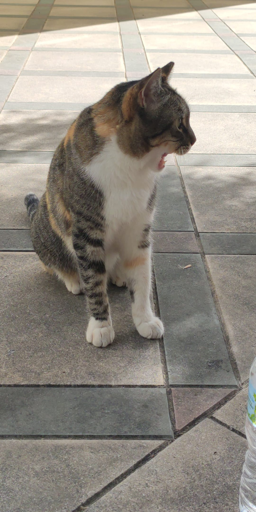

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Entrada: The cat is sitting
the cat is sitting on the ground

Entrada: The cat is looking
the cat is looking at the water bottle

Entrada: The weather is
the weather is sunny

Entrada: [sin entrada]
a cat sitting on the ground next to a water bottle



In [ ]:
import torch
from transformers import AutoProcessor, AutoModelForVision2Seq
from IPython.display import display

# Cargamos imagen
image = Image.open(IMG_PATH)
display(image.resize((256, 512)))

# Usamos Clases Auto para cargar nuestro modelo.
# Aqui no usamos un tokenizador, usamos un "procesador"
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = AutoModelForVision2Seq.from_pretrained("Salesforce/blip-image-captioning-base")

# Encontrar dispositivo para el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

# Entradas para nuestro modelo
prompts = [
    "The cat is sitting",
    "The cat is looking",
    "The weather is",
    None  # No prompt: default captioning
]

# Generamos descripciones
for prompt in prompts:
    if prompt is None:
        inputs = processor(images=image, return_tensors="pt").to(device)
    else:
        inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

    out = model.generate(**inputs)
    desc = processor.decode(out[0], skip_special_tokens=True)
    print(f"Entrada: {prompt or '[sin entrada]'}\n{desc}\n")


## Integrando Grad-Cam++ en BLIP

Al igual que antes, podemos realizar operaciones más complejas si nos familiarizamos con el flujo definido por la librería y conocemos sus entradas y salidas. En este ejemplo vamos a integral una técnica de explicabilidad llamada `Grad-CAM`.

Grad-CAM (_Gradient-weighted Class Activation Mapping_) es una técnica de visualización que permite identificar qué regiones de una entrada (como una imagen) influyen más en la decisión de un modelo. Aunque fue desarrollada originalmente para redes neuronales convolucionales (CNNs), su principio general puede extenderse a otros modelos que sean diferenciables y conserven alguna estructura relevante, como los transformers en visión (ViT) o modelos multimodales (como BLIP o CLIP).

Grad-CAM genera un mapa de calor que resalta las áreas más relevantes para una predicción, y es útil para interpretar, validar o depurar decisiones del modelo. Puede utilizarse en una variedad más amplia de arquitecturas siempre que se disponga de activaciones internas y gradientes asociados a una salida objetivo.

Nuestro objetivo es **determinar** en qué zona de la imagen se ha fijado el modelo para **predicir** un palabra específica de la descripción generada. Para la imagen anterior, esperamos que al estudiar qué características de la imagen han sido relevantes para la palabra "cat" se observen altos valores en la zona de la imagen donde aparece.

Instalamos la librería `grad-cam` para hacer uso de esta técnica.

In [ ]:
!pip install grad-cam --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Importamos las librerías y funciones a usar para ello

In [ ]:
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt

Procesamos la imagen con el `processor`, al igual que antes. Extraemos el valor de sus píxeles.

In [ ]:
# Procesamos la imagen como un tensor y obtenemos el valor de sus pixeles
inputs = processor(image, return_tensors="pt").to(device)
pixel_values = inputs["pixel_values"]

Realizamos un **paso hacia adelante** del modelo para obtener su descripción no condicionada.

In [ ]:
# Obtenemos la descripción a partir del modelo
with torch.no_grad():
    gen_ids = model.generate(**inputs)
    caption = processor.decode(gen_ids[0], skip_special_tokens=True)
print(f"Descripción: {caption}")

Descripción: a cat sitting on the ground next to a water bottle


Obtenemos los tokens emitidos por el modelo, para así poder determinar el que queremos estudiar con GradCam.

In [ ]:
# Buscamos los tokens que se corresponden con la descripción del modelo
tokens = processor.tokenizer.tokenize(caption)
print("Tokens:", tokens)

Tokens: ['a', 'cat', 'sitting', 'on', 'the', 'ground', 'next', 'to', 'a', 'water', 'bottle']


A partir de la descripción, fijamos sobre qué token queremos trabajar. En nuestro caso, será "cat"

In [ ]:
# Palabra de la que se quiere sacar el mapa de saliencia
PALABRA = "cat"

# Buscamos el token que se corresponde con nuestra palabra clave
if PALABRA not in tokens:
    raise ValueError(f"Word '{PALABRA}' not found in caption.")

Obtenemos el índice de nuestro token en la descripción generada y el índice en el vocabulario del modelo con el que se corresponde con él.

In [ ]:
# Obtenemos su índice
word_idx = tokens.index(PALABRA)

# Y su identificador
tokenid = processor.tokenizer.convert_tokens_to_ids(PALABRA)
print(f"La palabra '{PALABRA}' ocupa el índice {word_idx} en la lista. Su índice en el vocabulario del modelo es {tokenid}")

La palabra 'cat' ocupa el índice 1 en la lista. Su índice en el vocabulario del modelo es 4937


Obtenemos los índices en el vocabulario del modelo de los tokens generados en el paso hacia adelante anterior (tokenización).

In [ ]:
cap_inputs = processor(text=[caption], return_tensors="pt").to(device)
input_ids  = cap_inputs["input_ids"]  # shape: (1, seq_len)

La librería `grad-cam` requiere trabajar únicamente con los valores en bruto devueltos por el modelo (_logits_). Es por ello, que creamos un módulo de pytorch que actúe como _wrapper_ para devolverlos ya que, por defecto, el modelo de Hugging Face devuelve elementos adicionales. Condicionamos la entrada textual a nuestra imagen y a los indices de los tokens que se corresponden con la descripción generada por el modelo de la imágen. De esta manera, obtenemos los _logits_ que representan a cada uno de ellos.

In [ ]:
# Wrapper para obtener los valores crudos del modelo tras procesar nuestra información (forzar la descripción generada para nuestra imagen)
class FullBlipWrapper(torch.nn.Module):
    def __init__(self, blip_model, input_ids):
        super().__init__()
        self.model     = blip_model
        self.input_ids = input_ids

    def forward(self, pixel_values):
        outputs = self.model(
            pixel_values=pixel_values,
            input_ids=self.input_ids,
            return_dict=True
        )
        return outputs.logits  # shape: (1, seq_len, vocab_size)

wrapper = FullBlipWrapper(model, input_ids)

También tenemos que declarar una clase que se encargue de procesar estos _logits_ y obtener los que se corresponden con nuestro token a estudiar. La clase `TokenLogitTarget` se encarga de obtener este valor a partir de la localización del token en la descripción y de su índice en el vocabulario del modelo.

In [ ]:
# Clase que permite localizar el valor en crudo calculado por el modelo correspondiente a un token.
# En este caso, será nuestra palabra clave (gato, por ejemplo)
class TokenLogitTarget():
    def __init__(self, seq_pos, token_id):
        self.seq_pos  = seq_pos # Posición del token en la descripción
        self.token_id = token_id # Id en el modelo

    def __call__(self, logits):
        # logits: (1, seq_len, vocab_size) or (seq_len, vocab_size)
        print(logits.shape)
        if logits.dim() == 3:
            return logits[0, self.seq_pos+1, self.token_id] # Se suma 1 por la existencia de un token especial que indica el inicio de una frase
        else:
            return logits[self.seq_pos+1, self.token_id]

targets = [TokenLogitTarget(word_idx, tokenid)]

Tenemos que especificar también sobre que capa del modelo queremos calcular el mapa de saliencia. BLIP combina un codificador de la imagen con un decodificador que la entiende y genera su descripción. Por ello, se ha decidido colocar como "capa objetivo" el último perceptrón multicapa de la última capa del codificador. Puedes probar con diferentes capas si te interesa.

In [ ]:
# Capa/capas a partir de la que queremos calcular el mapa de saliencia
# Cómo queremos saber donde se ha fijado el modelo, lo hacemos a partir de la última capa
# del codificador cuya función es "entender" la imagen.
target_layers = [model.vision_model.encoder.layers[-1].mlp]

print(model.vision_model)

BlipVisionModel(
  (embeddings): BlipVisionEmbeddings(
    (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (encoder): BlipEncoder(
    (layers): ModuleList(
      (0-11): 12 x BlipEncoderLayer(
        (self_attn): BlipAttention(
          (dropout): Dropout(p=0.0, inplace=False)
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (projection): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): BlipMLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


Función auxiliar para redimensionar el tensor según las especificaciones de la librería.

In [ ]:
# Cambiar la forma del tensor de (B, tokens, dim) a (B, dim, H, W)
def blip_reshape_transform(tensor):
    tensor = tensor[:, 1:, :]   # drop CLS
    B, N, C = tensor.shape
    size = int(N ** 0.5)
    tensor = tensor.reshape(B, size, size, C)
    return tensor.permute(0, 3, 1, 2)  # → (B, C, H, W)

Por último, usamos el _wrapper_ de nuestro modelo, la lista de capas objetivo y la función de preprocesamiento anterior para crear nuestra _Grad-Cam_ y aplicarla a nuestro token objetivo. Dibujamos los resultados obtenidos y comprobamos la explicación.

torch.Size([13, 30524])


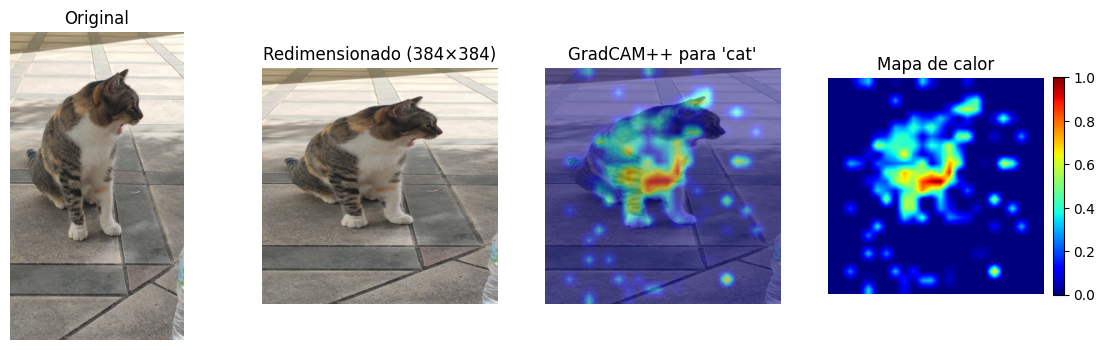

In [ ]:
# Construir objeto GradCam++ para realizar nuestro mapa de saliencia
cam = GradCAMPlusPlus(
    model=wrapper, # Le damos el wrapper que devuelve los valores brutos calculados por el modelo
    target_layers=target_layers, # Las capas que tomamos para calcular el mapa de saliencia
    reshape_transform=blip_reshape_transform, # La función de preprocesamiento que hemos hecho para adaptar nuestro modelo al método
)

# Ejecutamos GradCam y obtenemos el mapa de calor para la palabra objetivo
grayscale_cam = cam(input_tensor=pixel_values, targets=targets)[0]  # (H, W)

# Dibujamos
H, W = grayscale_cam.shape
img_resized = image.resize((W, H)) # Redimensionamos la imagen al tamaño de la cámara
img_np = np.array(img_resized).astype(np.float32) / 255.0 # Pasamos los píxeles a 0 y 1
vis = show_cam_on_image(img_np, grayscale_cam, use_rgb=True) # Obtenemos el mapa de calor sobre la imagen original

# Dibujamos
plt.figure(figsize=(14, 4))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

# Imagen redimensionada
plt.subplot(1, 4, 2)
plt.imshow(img_resized)
plt.title(f"Redimensionado ({W}×{H})")
plt.axis("off")

# GradCAM
plt.subplot(1, 4, 3)
plt.imshow(vis)
plt.title(f"GradCAM++ para '{PALABRA}'")
plt.axis("off")

# Mapa de calor con escala
ax = plt.subplot(1, 4, 4)
im = ax.imshow(grayscale_cam, cmap="jet", vmin=0, vmax=1)
ax.set_title("Mapa de calor")
ax.axis("off")
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

**[EJERCICIO]** Prueba con otros tokens, e incluso imágenes. ¿Qué ocurre con el mapa de saliencia? ¿Es siempre igual de claro? ¿Y si cambias la capa objetivo a otra diferente?

# Generación de geometría 3D

MeshGPT es un modelo basado en Transformers diseñado para generar y manipular modelos 3D de mallas (meshes) a partir de palabras. En lugar de trabajar con imágenes o texto, MeshGPT crea objetos tridimensionales detallados y editables, como sillas, armas o frutas, permitiendo transformar lenguaje natural en geometría 3D. Esto abre muchas posibilidades en diseño, animación y realidad virtual.

In [ ]:
!pip install git+https://github.com/MarcusLoppe/meshgpt-pytorch.git torchtyping --quiet

In [ ]:
from meshgpt_pytorch import MeshAutoencoder, MeshTransformer, mesh_render
import torch, trimesh
import pythreejs as three

device = "cuda" if torch.cuda.is_available() else "cpu"
transformer = MeshTransformer.from_pretrained("MarcusLoren/MeshGPT-preview").to(device)

texts = ['chair', 'gun', 'cross', 'apple', 'mesa', 'silla']
meshes = transformer.generate(texts=texts, temperature=0)
mesh_render.save_rendering(f'./render0.obj', meshes)
meshes = transformer.generate(texts=texts, temperature=0.5)
mesh_render.save_rendering(f'./render5.obj', meshes)
meshes = transformer.generate(texts=texts, temperature=0.9)
mesh_render.save_rendering(f'./render9.obj', meshes)


Visualiza los resultados en https://3dviewer.net/

**[EJERCICIO]** ¿Cómo podemos mejorar los resultados para palabras en español? ¿Cómo afecta la temperatura a las salidas del modelo?

# Ajuste (_fine-tuning_) de modelos pre-entrenados



Hasta ahora hemos utilizado modelos preentrenadospara realizar inferencias rápidas y sin necesidad de entrenamiento adicional. Sin embargo, en muchas aplicaciones reales queremos adaptar un modelo a un dominio o conjunto de datos específico. Esto se conoce como **fine-tuning**.

El siguiente recurso permite conocer cómo integrar HuggingFace y Pytorch Lightning para poder adaptar cualquier modelo contenido en la librería de `transformers` a nuestra tarea. En concreto, se trabaja con un Transformer que solo cuenta con codificadores (_encoders_) llamado BERT para resolver una tarea de clasificación multi-etiqueta.

https://curiousily.com/posts/multi-label-text-classification-with-bert-and-pytorch-lightning/